In [1]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    %matplotlib inline
    import matplotlib.cm as cm
    from sklearn.decomposition import PCA
    from sklearn.manifold import TSNE

In [2]:
bankdata=pd.read_csv("bank-full.csv",delimiter=';')
bankdata

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [3]:
bankdata.head()
x_features=list(bankdata.columns)
x_features.remove('y')

In [4]:
encoded_bankdata=pd.get_dummies(bankdata[x_features],drop_first=True)

In [5]:
list(encoded_bankdata.columns)

['age',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_married',
 'marital_single',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'default_yes',
 'housing_yes',
 'loan_yes',
 'contact_telephone',
 'contact_unknown',
 'month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [6]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scaled_data = scale.fit_transform(encoded_bankdata)
scaled_data

array([[ 1.60696496,  0.25641925, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [ 0.28852927, -0.43789469, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.74738448, -0.44676247, -1.29847633, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       ...,
       [ 2.92540065,  1.42959305,  0.14341818, ..., -0.20597248,
         5.37784754, -2.11631591],
       [ 1.51279098, -0.22802402,  0.14341818, ..., -0.20597248,
        -0.185948  ,  0.47251925],
       [-0.37068857,  0.52836436,  0.14341818, ...,  4.85501757,
        -0.185948  , -2.11631591]])

In [7]:
#creating the data frame of scaled column 
scaled_data = pd.DataFrame(scaled_data,columns=encoded_bankdata.columns)
scaled_data.head()

,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,-0.523740,5.422561,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,1.909346,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,-0.523740,-0.184415,-0.16793,...,-0.424206,-0.366006,-0.103262,1.511374,-0.310263,-0.128819,-0.113898,-0.205972,-0.185948,0.472519


In [8]:
#splitting the dataset into train and test

from sklearn.model_selection import train_test_split
Y = bankdata.y.map(dict(yes=1, no=0))
X_train,X_test,Y_train,Y_test=train_test_split(scaled_data,Y,test_size=0.3,random_state=123)
Y

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int64

In [9]:
pca = PCA(n_components=42)
pca_model = pca.fit(X_train)

In [10]:
pca_model

PCA(n_components=42)

In [11]:
pca_train = pca_model.transform(X_train)
pca_train

array([[-5.14035992e-01, -9.36653409e-01,  1.39757268e+00, ...,
         9.83987908e-01,  6.31426154e-02, -6.42669816e-02],
       [ 4.67874647e+00,  3.64728395e+00,  1.09254740e+00, ...,
         7.95172569e-01,  2.92455991e-01, -2.00246346e-01],
       [-1.94471181e+00,  1.40781667e+00,  1.06099825e+00, ...,
        -2.02978254e-01, -3.20336580e-03,  1.89930364e-01],
       ...,
       [-6.53697839e-01, -1.16555932e+00,  1.88948889e+00, ...,
         6.58057313e-02, -4.51010634e-02, -1.11286962e-01],
       [ 4.05832461e-01, -1.98379548e+00,  2.05521266e+00, ...,
         7.45608341e-02,  1.09171363e-01,  1.99618884e-03],
       [ 2.45906006e-01, -2.18773681e+00, -2.17912952e+00, ...,
        -1.01654760e-01,  1.57447273e-02, -1.07795980e-01]])

In [12]:
Variable_Names =list(encoded_bankdata.columns)
Matrix = pd.DataFrame(pca_model.components_,columns=Variable_Names)
Matrix1 = np.transpose(Matrix)
Matrix1

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
age,-0.005141,-0.161515,0.447043,0.094899,0.103048,0.094661,-0.036182,-0.109784,-0.036695,-0.133535,...,-0.095927,-0.105514,0.181294,-0.711459,-0.053861,-0.205294,-0.102874,0.029912,0.008880,0.001736
balance,0.059125,-0.102998,0.047389,0.076747,0.083322,0.066257,-0.052538,-0.250337,0.050808,0.251627,...,0.019758,0.019254,-0.017184,0.050226,0.013092,0.022814,0.017631,0.003850,0.002259,-0.002609
day,-0.049888,-0.085717,-0.014864,-0.161439,-0.358734,0.434017,-0.259982,-0.031210,0.167720,0.035987,...,0.015255,-0.270563,-0.509023,-0.072396,-0.146720,0.000236,0.004265,0.001420,0.000022,-0.043593
duration,0.013359,0.011587,-0.006998,-0.003501,0.047918,0.060529,0.101538,-0.249258,-0.070826,-0.121593,...,-0.033795,-0.060764,-0.002501,-0.007907,0.010009,-0.000301,0.004480,0.008575,-0.002148,-0.011663
campaign,-0.077742,-0.090601,0.002814,-0.075804,-0.124354,0.000708,-0.158019,0.430703,0.018650,-0.037833,...,-0.022031,0.037871,0.296262,0.055591,0.004658,0.003348,-0.003240,0.002649,-0.006640,0.026740
pdays,0.439285,0.226726,0.074901,0.063583,-0.052803,-0.016951,-0.038340,0.105639,0.049218,-0.026870,...,-0.048536,-0.426946,-0.024876,0.053733,0.144779,0.006237,0.017296,-0.012942,0.624629,-0.009448
previous,0.369711,0.144209,0.073730,0.051076,-0.025260,-0.014975,-0.052833,0.148046,0.138212,-0.039616,...,0.064527,0.048287,-0.006659,0.001828,-0.027368,0.005778,-0.003457,-0.000657,0.055423,0.006842
job_blue-collar,-0.112866,0.243722,0.108436,0.108828,-0.079920,0.125429,0.087056,0.251228,-0.274984,0.248138,...,0.234936,-0.040945,0.032589,-0.090344,0.005991,0.007237,-0.155030,-0.451627,-0.012559,0.009813
job_entrepreneur,-0.012892,-0.029900,0.024913,0.058313,-0.056129,-0.019637,0.144439,-0.039222,0.177397,0.061377,...,-0.083767,0.010377,-0.033044,-0.011672,0.004042,-0.020742,0.043079,-0.212817,-0.005981,0.009991
job_housemaid,-0.026095,-0.061749,0.089901,-0.018522,0.085755,0.018951,0.002950,0.137685,0.143950,0.029429,...,0.005550,0.041099,-0.015898,0.053669,0.000656,-0.008829,-0.067309,-0.199184,0.001696,0.010134


In [13]:
pca_model.explained_variance_

array([3.03715616, 2.67258556, 2.33495046, 1.93791985, 1.68691333,
       1.39533924, 1.37210088, 1.29604957, 1.24968412, 1.20802582,
       1.13752878, 1.12768641, 1.11441045, 1.10361101, 1.04931436,
       1.03758975, 1.03014336, 1.02383549, 1.01984363, 0.99859358,
       0.9827527 , 0.9749147 , 0.95885058, 0.9045782 , 0.88455728,
       0.86861181, 0.84018761, 0.82143159, 0.79047229, 0.7776154 ,
       0.7031907 , 0.61350695, 0.6011647 , 0.53032982, 0.50191798,
       0.46388732, 0.26374373, 0.2074198 , 0.17598447, 0.12344091,
       0.09653913, 0.07106448])

In [14]:
var = pca_model.explained_variance_ratio_
var

array([0.07233142, 0.06364899, 0.05560803, 0.04615255, 0.0401747 ,
       0.03323071, 0.03267728, 0.03086608, 0.02976186, 0.02876975,
       0.02709083, 0.02685643, 0.02654025, 0.02628306, 0.02498996,
       0.02471073, 0.02453339, 0.02438316, 0.0242881 , 0.02378201,
       0.02340476, 0.02321809, 0.02283551, 0.02154299, 0.02106618,
       0.02068643, 0.0200095 , 0.01956281, 0.0188255 , 0.01851931,
       0.01674684, 0.01461098, 0.01431704, 0.01263007, 0.01195343,
       0.01104771, 0.00628119, 0.00493981, 0.00419116, 0.00293981,
       0.00229913, 0.00169244])

Text(0, 0.5, 'Cumulative Proportion of Variance Explained')

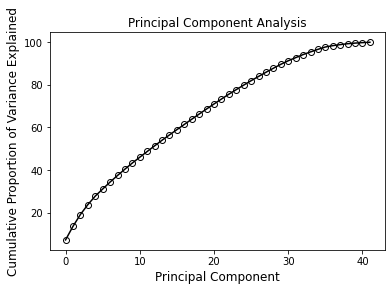

In [15]:
cumulative_var = np.cumsum(np.round(var, decimals=4)*100)
plt.plot(cumulative_var,'k-o',markerfacecolor='None',markeredgecolor='k')
plt.title('Principal Component Analysis',fontsize=12)
plt.xlabel("Principal Component",fontsize=12)
plt.ylabel("Cumulative Proportion of Variance Explained",fontsize=12)

In [21]:
pca_train = pd.DataFrame(pca_train,columns=['PC_' + str(i) for i in range(1, 43)])
pca_train.head()

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_33,PC_34,PC_35,PC_36,PC_37,PC_38,PC_39,PC_40,PC_41,PC_42
0,-0.514036,-0.936653,1.397573,-0.915189,0.812019,-1.689426,-1.192609,0.005106,-0.988716,0.200802,...,-0.757363,0.330374,0.391584,-0.298964,0.248087,-0.162367,-0.185117,0.983988,0.063143,-0.064267
1,4.678746,3.647284,1.092547,0.423221,-1.054910,-0.420054,-0.173441,0.909365,1.146343,-1.533935,...,-0.579280,-1.179038,0.183635,-0.718942,-0.746809,1.047942,-0.069488,0.795173,0.292456,-0.200246
2,-1.944712,1.407817,1.060998,-0.134019,-0.811227,-0.739307,2.146599,0.924528,-0.117211,-0.786865,...,-0.123259,0.826959,0.602068,-0.088831,1.937019,-0.058313,-0.537383,-0.202978,-0.003203,0.189930
3,-0.166326,-2.646847,-0.575250,0.310344,-2.318588,1.046647,0.556276,1.028730,0.113515,-1.181509,...,-0.549939,-0.153239,-0.128803,-2.008479,-0.194680,0.801740,-0.146680,-0.118332,-0.005928,-0.102763
4,-1.958253,2.340955,0.076703,0.111633,-1.198642,-0.313459,0.201950,-0.628965,1.128171,-1.358569,...,0.626003,-0.020079,-0.464771,0.402877,0.288914,-0.027697,-0.058162,-0.174614,-0.023264,0.028110


In [101]:
Y_train1 = Y_train.reset_index()
columns_list=list(pca_train.columns)[0:30]+list('y')
pca_train1 = pd.concat([pca_train,Y_train1],axis=1)
pca_train2 = pca_train1.drop(columns='index')
pca_train3 = pca_train1[columns_list]

In [91]:
pca_train3

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,y
0,-0.514036,-0.936653,1.397573,-0.915189,0.812019,-1.689426,-1.192609,0.005106,-0.988716,0.200802,...,-0.348112,0.340881,-0.059865,-0.365993,0.620427,-0.230284,-0.160164,-0.096300,1.005724,0
1,4.678746,3.647284,1.092547,0.423221,-1.054910,-0.420054,-0.173441,0.909365,1.146343,-1.533935,...,0.765788,0.758605,-0.725947,-1.553234,-0.334887,-0.632986,2.086697,0.472186,1.064793,0
2,-1.944712,1.407817,1.060998,-0.134019,-0.811227,-0.739307,2.146599,0.924528,-0.117211,-0.786865,...,-0.359034,0.026728,0.166880,-0.667489,0.136961,0.392126,0.883017,-0.030340,0.377898,0
3,-0.166326,-2.646847,-0.575250,0.310344,-2.318588,1.046647,0.556276,1.028730,0.113515,-1.181509,...,0.314446,-0.027780,-0.428831,-0.338003,-0.507374,0.159004,-1.209014,1.046856,-0.659197,0
4,-1.958253,2.340955,0.076703,0.111633,-1.198642,-0.313459,0.201950,-0.628965,1.128171,-1.358569,...,-0.401363,-0.568828,0.393009,-0.705320,-0.085066,0.110188,1.614144,-0.770616,-0.087664,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.577285,1.215234,0.778575,0.431477,-0.021477,0.890416,-0.169330,-2.569117,-0.239013,0.992439,...,1.850960,2.265391,1.368209,-1.682515,-0.148376,-0.376525,0.951963,0.244734,0.273678,1
31643,-0.042790,-2.050076,-0.584448,0.922443,-2.028069,-0.032836,1.393060,0.081302,-0.201470,-0.758259,...,-0.302726,-0.109848,0.637695,0.128723,-0.173113,0.107099,-1.182681,1.086566,0.496694,0
31644,-0.653698,-1.165559,1.889489,-1.264586,-1.272792,2.032731,1.667645,0.823688,-1.204438,0.761057,...,-0.125463,-0.205290,0.243396,1.695175,0.502051,-0.245729,-0.099622,-0.467728,1.966035,0
31645,0.405832,-1.983795,2.055213,-1.655267,-0.049273,3.301351,0.218122,-2.003374,0.744336,3.436648,...,0.232228,-0.039715,0.988253,1.302874,0.412036,0.500752,2.027677,-1.411765,2.313402,0


In [106]:
#creating dataset having principal components
new_list=list(pca_train3.columns)
new_list.remove('y')
pca_train_X=pca_train3[new_list]

In [107]:
pca_train_X

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_21,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30
0,-0.514036,-0.936653,1.397573,-0.915189,0.812019,-1.689426,-1.192609,0.005106,-0.988716,0.200802,...,0.347126,-0.348112,0.340881,-0.059865,-0.365993,0.620427,-0.230284,-0.160164,-0.096300,1.005724
1,4.678746,3.647284,1.092547,0.423221,-1.054910,-0.420054,-0.173441,0.909365,1.146343,-1.533935,...,0.013524,0.765788,0.758605,-0.725947,-1.553234,-0.334887,-0.632986,2.086697,0.472186,1.064793
2,-1.944712,1.407817,1.060998,-0.134019,-0.811227,-0.739307,2.146599,0.924528,-0.117211,-0.786865,...,-0.071896,-0.359034,0.026728,0.166880,-0.667489,0.136961,0.392126,0.883017,-0.030340,0.377898
3,-0.166326,-2.646847,-0.575250,0.310344,-2.318588,1.046647,0.556276,1.028730,0.113515,-1.181509,...,-0.411120,0.314446,-0.027780,-0.428831,-0.338003,-0.507374,0.159004,-1.209014,1.046856,-0.659197
4,-1.958253,2.340955,0.076703,0.111633,-1.198642,-0.313459,0.201950,-0.628965,1.128171,-1.358569,...,-0.249232,-0.401363,-0.568828,0.393009,-0.705320,-0.085066,0.110188,1.614144,-0.770616,-0.087664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,-1.577285,1.215234,0.778575,0.431477,-0.021477,0.890416,-0.169330,-2.569117,-0.239013,0.992439,...,1.195509,1.850960,2.265391,1.368209,-1.682515,-0.148376,-0.376525,0.951963,0.244734,0.273678
31643,-0.042790,-2.050076,-0.584448,0.922443,-2.028069,-0.032836,1.393060,0.081302,-0.201470,-0.758259,...,-0.136041,-0.302726,-0.109848,0.637695,0.128723,-0.173113,0.107099,-1.182681,1.086566,0.496694
31644,-0.653698,-1.165559,1.889489,-1.264586,-1.272792,2.032731,1.667645,0.823688,-1.204438,0.761057,...,-0.186142,-0.125463,-0.205290,0.243396,1.695175,0.502051,-0.245729,-0.099622,-0.467728,1.966035
31645,0.405832,-1.983795,2.055213,-1.655267,-0.049273,3.301351,0.218122,-2.003374,0.744336,3.436648,...,-0.353360,0.232228,-0.039715,0.988253,1.302874,0.412036,0.500752,2.027677,-1.411765,2.313402


In [116]:
import statsmodels.api as sm
X=sm.add_constant(pca_train_X)
logit=sm.Logit(list(Y_train),X)
logit_model=logit.fit()

Optimization terminated successfully.
         Current function value: 0.245892
         Iterations 8


In [117]:
logit_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                31647
Model:                          Logit   Df Residuals:                    31616
Method:                           MLE   Df Model:                           30
Date:                Tue, 02 Feb 2021   Pseudo R-squ.:                  0.3211
Time:                        21:43:56   Log-Likelihood:                -7781.7
converged:                       True   LL-Null:                       -11463.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.7284      0.028    -97.383      0.000      -2.783      -2.674
PC_1           0.4442      0.012     36.199      0.000       0.420       0.468
PC_2          -0.1976      0.014    -14.353      0.000      -0.225      -0.171
PC_3          -0.0131      0.013     -1.027      0.304      -0.038       0.012
PC_4          -0.1415      0.016     -8.757      0.000      -0.173      -0.110
PC_5           0.3946      0.017     23.321      0.000       0.361       0.428
PC_6           0.0989      0.017      5.921      0.000       0.066       0.132
PC_7           0.1086      0.019      5.842      0.000       0.072       0.145
PC_8          -0.4259      0.021    -19.821      0.000      -0.468      -0.384
PC_9          -0.1439      0.020     -7.196      0.000      -0.183      -0.105
PC_10         -0.2414      0.019    -12.954      0.000      -0.278      -0.205
PC_11         -0.2780      0.018    -15.393      0.000      -0.313      -0.243
PC_12         -0.4631      0.020    -22.611      0.000      -0.503      -0.423
PC_13         -0.0650      0.021     -3.154      0.002      -0.105      -0.025
PC_14          0.2297      0.019     11.801      0.000       0.192       0.268
PC_15         -0.1517      0.015     -9.961      0.000      -0.182      -0.122
PC_16         -0.0262      0.023     -1.148      0.251      -0.071       0.019
PC_17         -0.0329      0.022     -1.519      0.129      -0.075       0.010
PC_18          0.4061      0.020     20.002      0.000       0.366       0.446
PC_19          0.1367      0.021      6.361      0.000       0.095       0.179
PC_20         -0.1257      0.017     -7.500      0.000      -0.159      -0.093
PC_21          0.3595      0.017     20.617      0.000       0.325       0.394
PC_22          0.0249      0.022      1.120      0.263      -0.019       0.068
PC_23          0.4148      0.018     22.493      0.000       0.379       0.451
PC_24          0.0554      0.019      2.925      0.003       0.018       0.093
PC_25          0.2320      0.023     10.048      0.000       0.187       0.277
PC_26         -0.0645      0.020     -3.186      0.001      -0.104      -0.025
PC_27         -0.1707      0.021     -8.167      0.000      -0.212      -0.130
PC_28          0.0490      0.025      1.991      0.046       0.001       0.097
PC_29          0.0002      0.022      0.011      0.991      -0.043       0.043
PC_30         -0.1177      0.025     -4.707      0.000      -0.167      -0.069
==============================================================================
"""

In [114]:
Y_train

19100    0
37958    0
12451    0
18263    0
5128     0
        ..
7763     1
15377    0
17730    0
28030    0
15725    0
Name: y, Length: 31647, dtype: int64

In [118]:
pca_test = pca.transform(X_test)
pca_test

array([[-1.71746073e+00,  1.37665806e+00,  7.97553725e-01, ...,
        -1.13153712e-01,  2.56602264e-03, -3.26803018e-02],
       [ 3.46868123e-01, -3.06044507e+00, -4.41481352e-01, ...,
        -3.86103639e-02,  5.29129632e-02, -9.79174775e-03],
       [-8.33174820e-02,  2.25601488e-01, -1.62461216e+00, ...,
        -2.56439192e-01, -1.39044581e-02,  1.08671343e+00],
       ...,
       [-1.29806283e+00,  1.57638370e+00, -1.31498021e+00, ...,
         9.06913935e-01,  5.95103907e-03, -4.80760051e-02],
       [ 3.43138843e+00, -1.78719488e-01, -1.57209897e+00, ...,
         7.60493308e-02, -9.92419734e-01, -2.54860250e-01],
       [-1.72712033e+00, -2.27113284e-02,  8.98224702e-01, ...,
        -4.51265896e-02,  4.99806063e-02, -1.30396387e-01]])

In [119]:
pca_test = pd.DataFrame(pca_test,columns=['PC_' + str(i) for i in range(1, 43)])
Y_test1 = Y_test.reset_index()
pca_test1 = pd.concat([pca_test,Y_test1],axis=1)
pca_test1 = pca_test1.drop(columns='index')
pca_test2 = pca_test1[list(pca_train3.columns)]
pca_test2

,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,...,PC_22,PC_23,PC_24,PC_25,PC_26,PC_27,PC_28,PC_29,PC_30,y
0,-1.717461,1.376658,0.797554,0.232807,-0.598630,0.253808,-2.056215,-1.359426,-0.171670,-0.754705,...,0.291829,0.041165,0.724648,0.501981,-0.450168,-0.365506,0.054587,0.587579,-0.436257,1
1,0.346868,-3.060445,-0.441481,1.079285,-0.284334,-1.668713,-0.978470,0.590969,-0.966121,0.083734,...,-0.456553,-0.158928,0.231394,-0.216288,0.460116,-0.215377,-0.137388,-0.168836,0.975128,0
2,-0.083317,0.225601,-1.624612,-1.936872,1.912574,-0.683874,1.121431,-1.294037,-0.207001,1.767527,...,1.246834,0.853829,0.348180,-2.254302,0.942381,0.125128,-0.476462,-0.515263,1.448074,0
3,0.200352,-3.334896,-0.228697,0.774285,-0.938130,-0.805478,-1.489331,0.634633,-0.731465,-0.087462,...,-0.223501,0.298510,0.156079,-0.214661,0.164230,-0.545120,0.043624,-0.061219,0.236379,0
4,-0.689599,0.666209,1.558434,-0.014796,0.993733,0.628563,-0.258088,-1.302105,-1.533795,-2.049370,...,0.429116,-0.051254,-0.988647,-1.161059,-0.156031,-0.256294,-0.750419,1.345778,-0.573615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,-1.369848,2.012356,-2.505047,-0.875417,-0.215510,0.505017,-1.934416,-0.657943,0.040400,-0.471979,...,0.248796,-0.651168,-0.062109,0.155718,0.003549,0.058963,-0.385023,0.255669,-0.194900,0
13560,1.364796,3.150189,-1.138571,0.019308,0.116827,0.130873,0.157600,0.307984,-1.327808,0.147826,...,0.304838,0.219085,-1.290765,-0.114155,0.537602,0.124220,-0.440980,-0.126532,0.360318,0
13561,-1.298063,1.576384,-1.314980,0.079860,0.215949,1.194513,-0.859000,-0.805116,-0.161011,-0.476051,...,0.424867,-0.145365,-0.711520,-0.382664,0.262653,0.447729,-0.113851,0.442600,-0.037739,0
13562,3.431388,-0.178719,-1.572099,-0.510766,0.411319,0.821152,-1.477918,-1.139252,0.495580,-0.962528,...,2.806508,-9.144042,1.224211,-0.569654,3.181507,2.867978,-1.246507,-1.784386,-1.803673,0


In [131]:
pca_test_X = pca_test2[list(pca_test2.columns)[0:30]]
pca_test_X.head()
Y=pca_test2[list(pca_test2.columns)[30:]]
Y

,y
0,1
1,0
2,0
3,0
4,0
...,...
13559,0
13560,0
13561,0
13562,0


In [147]:
y_pred_df=pd.DataFrame({"actual":Y.y,"predicted_prob":logit_model.predict(sm.add_constant(pca_test_X))})

In [148]:
y_pred_df

,actual,predicted_prob
0,1,0.052869
1,0,0.058193
2,0,0.071075
3,0,0.079708
4,0,0.026990
...,...,...
13559,0,0.011278
13560,0,0.066791
13561,0,0.010722
13562,0,0.250553


In [149]:
y_pred_df["predicted"]=y_pred_df.predicted_prob.map(lambda x: 1 if x >0.5 else 0)
y_pred_df
y_pred_df.sample(10,random_state=42)

,actual,predicted_prob,predicted
6325,0,0.041877,0
2435,0,0.041662,0
8040,0,0.050616,0
12438,0,0.046766,0
7937,0,0.008061,0
8803,0,0.095486,0
6831,0,0.092590,0
10777,0,0.022054,0
8046,0,0.064830,0
4026,0,0.098011,0


In [151]:
#creating a confusion matrix
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline
from sklearn import metrics

In [153]:
def draw_cm( actual, predicted ):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sn.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["Bad credit", "Good Credit"] ,
    yticklabels = ["Bad credit", "Good Credit"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

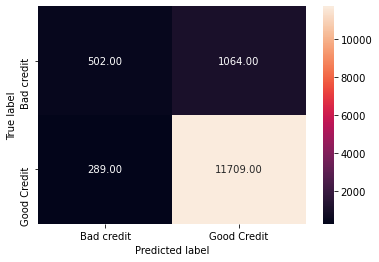

In [155]:
draw_cm(y_pred_df.actual,y_pred_df.predicted)

In [156]:
print( metrics.classification_report( y_pred_df.actual,y_pred_df.predicted ) )

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     11998
           1       0.63      0.32      0.43      1566

    accuracy                           0.90     13564
   macro avg       0.78      0.65      0.69     13564
weighted avg       0.88      0.90      0.89     13564

